# Data cleaning

### Crime data set

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
crime = pd.read_csv("Crime_Data_from_2020_to_Present_20250304.csv")
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [5]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
crime.shape

(1005050, 28)

In [7]:
crime['Premis Desc'].value_counts()

Premis Desc
STREET                                          261331
SINGLE FAMILY DWELLING                          163653
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    119008
PARKING LOT                                      69152
OTHER BUSINESS                                   47648
                                                 ...  
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
DEPT OF DEFENSE FACILITY                             2
HORSE RACING/SANTA ANITA PARK*                       2
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
Name: count, Length: 306, dtype: int64

In [8]:
crime.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151692
Vict Age                0
Vict Sex           144720
Vict Descent       144732
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677816
Weapon Desc        677816
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935908
Crm Cd 3          1002735
Crm Cd 4          1004986
LOCATION                0
Cross Street       850816
LAT                     0
LON                     0
dtype: int64

In [9]:
# These 2 cols are essential info for the data set, drop rows where Premis Desc and Crm Cd 1 are empty
crime = crime[(~crime['Premis Desc'].isnull()) & (~crime['Crm Cd 1'].isnull())]
crime.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151674
Vict Age                0
Vict Sex           144703
Vict Descent       144715
Premis Cd               0
Premis Desc             0
Weapon Used Cd     677423
Weapon Desc        677423
Status                  0
Status Desc             0
Crm Cd 1                0
Crm Cd 2           935467
Crm Cd 3          1002136
Crm Cd 4          1004387
LOCATION                0
Cross Street       850241
LAT                     0
LON                     0
dtype: int64

In [10]:
# add Mocode desc
mocode_desc = pd.read_csv("MO_CODES_Numerical_20180627.csv")
mocode_desc.rename(columns={"Mocode" : "Mocodes"}, inplace=True)
mocode_desc

,Mocodes,Mocode_Desc
0,101,Aid victim
1,102,Blind
2,103,Crippled
3,104,Customer
4,105,Delivery
...,...,...
814,4021,T/C - Topanga
815,4024,T/C - Central Traffic (CTD)
816,4025,T/C - South Traffic (STD)
817,4026,T/C - Valley Traffic (VTD)


### Building Inspections data

In [12]:
ins = pd.read_csv("Building_and_Safety_Inspections.csv")
ins.head()

/var/folders/bm/1zdq_80s1psgz2m98q3cbx1r0000gn/T/ipykernel_65199/290726186.py:1: DtypeWarning: Columns (2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  ins = pd.read_csv("Building_and_Safety_Inspections.csv")


,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)"
1,1000 S SANTA FE AVE,15016 10000 18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)"
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)"
3,1001 N LINDENWOOD LANE,16042 90000 14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)"
4,2836 S ANCHOR AVE,15016 20001 17211,CofO Issued,07/18/2016,Inspection,Permit Finaled,"(34.03878, -118.39963)"


In [13]:
ins.columns

Index(['ADDRESS', 'PERMIT', 'Permit Status', 'Inspection Date',
       'Inspection Type', 'Inspection Result', 'Latitude/Longitude'],
      dtype='object')

In [14]:
pd.DataFrame(ins['Latitude/Longitude'].tolist(), index=ins.index)

,0
0,"(34.06364, -118.41437)"
1,"(34.03143, -118.22981)"
2,"(34.13745, -118.38853)"
3,"(34.07732, -118.48578)"
4,"(34.03878, -118.39963)"
...,...
10237485,"(33.82922, -118.30673)"
10237486,"(33.94297, -118.40516)"
10237487,"(34.1444, -118.4964)"
10237488,"(34.18307, -118.53276)"


In [15]:
# Put Latitude and Longitude in their own cols
ins[['Latitude', 'Longitude']] = ins['Latitude/Longitude'].str.extract(r'\(([^,]+), ([^)]+)\)')

ins['Latitude'] = ins['Latitude'].astype(float)
ins['Longitude'] = ins['Longitude'].astype(float)


In [16]:
ins.isnull().sum()

ADDRESS                    1
PERMIT                     0
Permit Status         481120
Inspection Date       205257
Inspection Type       481137
Inspection Result     481419
Latitude/Longitude    481120
Latitude              481120
Longitude             481120
dtype: int64

In [17]:
ins = ins[~ins['Latitude/Longitude'].isnull()]
ins.isnull().sum()

ADDRESS                 1
PERMIT                  0
Permit Status           0
Inspection Date         0
Inspection Type        17
Inspection Result     299
Latitude/Longitude      0
Latitude                0
Longitude               0
dtype: int64

### Building data

In [19]:
bd = pd.read_csv("Listing_of_All_Businesses_20250304.csv")
bd.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION
0,0003217523-0001-2,MARIA OFELIA NUNEZ,LA CAMPANA HARDWARE,1017 W 88TH STREET,LOS ANGELES,90044-2119,1017 88TH 90044,1017 W 88TH STREET,LOS ANGELES,90044-2119,444130.0,Hardware stores,0,10/01/2020,NaN,"(33.9581, -118.2926)"
1,0003211603-0001-0,ONE STOP HOLISTIC HEALTH LLC,NaN,1506 W MANCHESTER AVENUE,LOS ANGELES,90047-5424,1506 MANCHESTER 90047,1506 W MANCHESTER AVENUE,LOS ANGELES,90047-5424,NaN,NaN,8,09/03/2020,NaN,"(33.9597, -118.3028)"
2,0003109317-0001-3,GINA BRADFORD,NaN,7847 CANBY AVENUE,RESEDA,91335-2096,7847 CANBY 91335,7847 CANBY AVENUE,RESEDA,91335-2096,NaN,NaN,4,01/01/2018,NaN,"(34.2133, -118.535)"
3,0002982075-0001-1,PRODYNAMICS INC,TITAN PHYSICAL THERAPY AND WELLNESS,12099 W WASHINGTON UNIT #408,LOS ANGELES,90066-0000,12099 WASHINGTON 90066-0000,NaN,NaN,NaN,621340.0,"Offices of physical, occupational & speech the...",11,01/01/2017,NaN,"(33.9982, -118.4238)"
4,0003252968-0001-1,LIZARRAGA TRANSPORT INC,NaN,9663 CARRON DRIVE,PICO RIVERA,90660-3606,9663 Carron 90660-3606,NaN,NaN,NaN,488000.0,Support activities for transportation (includi...,0,02/28/2021,NaN,"(33.9803, -118.0841)"


In [20]:
bd.columns

Index(['LOCATION ACCOUNT #', 'BUSINESS NAME', 'DBA NAME', 'STREET ADDRESS',
       'CITY', 'ZIP CODE', 'LOCATION DESCRIPTION', 'MAILING ADDRESS',
       'MAILING CITY', 'MAILING ZIP CODE', 'NAICS',
       'PRIMARY NAICS DESCRIPTION', 'COUNCIL DISTRICT', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION'],
      dtype='object')

In [21]:
bd['PRIMARY NAICS DESCRIPTION'].value_counts()

PRIMARY NAICS DESCRIPTION
Lessors of real estate (including mini warehouses & self-storage units)    46672
All other personal services                                                45244
Independent artists, writers, & performers                                 32035
Single Family Housing Construction (1997 NAICS)                            19054
All other professional, scientific, & technical services                   16739
                                                                           ...  
Plastics Bottle Manufacturing                                                  1
Gypsum Product Manufacturing                                                   1
Bowling Centers                                                                1
Automobile Driving Schools                                                     1
Office Supplies (except Paper) Manufacturing                                   1
Name: count, Length: 872, dtype: int64

# EDA

### Building inspections

In [24]:
# Permit status distribution
status = ins['Permit Status'].value_counts().reset_index()
status = status[status['count'] >= 1000]
status

,Permit Status,count
0,Issued,7115019
1,Permit Finaled,1743919
2,CofO Issued,515277
3,CofO in Progress,243706
4,Permit Expired,57386
5,Permit Closed,39521
6,OK for CofC,12499
7,Application Submitted,11150
8,CofO Corrected,7150
9,CofC Issued,5593


In [25]:
# Inspection type distribution
ins_type = ins['Inspection Type'].value_counts().reset_index()
ins_type = ins_type[ins_type['count'] >= 100000]
ins_type

,Inspection Type,count
0,Final,2331099
1,Rough,713980
2,Smoke Detectors,369194
3,Inspection,306776
4,Service/Power Release,275469
5,Footing/Foundation/Slab,269590
6,SGSOV-Seismic Gas S/O Valve,263274
7,Floor/Roof Diaphrgm/Shear Wall,242636
8,Drywall Nailing,217347
9,CofO Issuance,209942


In [26]:
ins.columns

Index(['ADDRESS', 'PERMIT', 'Permit Status', 'Inspection Date',
       'Inspection Type', 'Inspection Result', 'Latitude/Longitude',
       'Latitude', 'Longitude'],
      dtype='object')

In [27]:
# Time trends

# Convert 'Inspection Date' from string to datetime format
ins['Inspection Date'] = pd.to_datetime(ins['Inspection Date'], format='%m/%d/%Y')

# Extract Year and Month
ins['Year'] = ins['Inspection Date'].dt.year
ins['Month'] = ins['Inspection Date'].dt.month

monthly_ins_cnt = ins.groupby(['Year', 'Month']).count().reset_index()[['Year', 'Month', 'PERMIT']]


In [28]:
monthly_ins_cnt

,Year,Month,PERMIT
0,2013,1,53281
1,2013,2,49682
2,2013,3,53193
3,2013,4,55791
4,2013,5,57788
...,...,...,...
133,2024,10,91584
134,2024,11,73626
135,2024,12,78667
136,2025,1,86099


### Crime data

In [30]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [31]:
# Crime type distribution
crime_types = crime['Crm Cd Desc'].value_counts().reset_index()
crime_types = crime_types[crime_types['count'] >= 10000]
crime_types

,Crm Cd Desc,count
0,VEHICLE - STOLEN,115206
1,BATTERY - SIMPLE ASSAULT,74816
2,BURGLARY FROM VEHICLE,63516
3,THEFT OF IDENTITY,62538
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",61085
5,BURGLARY,57590
6,THEFT PLAIN - PETTY ($950 & UNDER),53707
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53504
8,INTIMATE PARTNER - SIMPLE ASSAULT,46708
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41307


In [32]:
crime['Date Rptd'].iloc[0]

'03/01/2020 12:00:00 AM'

In [33]:
crime['Date Rptd'].iloc[0]

crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
crime['Year'] = crime['Date Rptd'].dt.year
crime['Month'] = crime['Date Rptd'].dt.month

crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3
1,200106753,2020-02-09,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11
3,200907217,2023-05-10,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2023,5
4,200412582,2020-09-09,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,251004092,2025-01-25,01/24/2025 12:00:00 AM,1240,10,West Valley,1008,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,331.0,NaN,NaN,NaN,7600 WOODLEY AV,NaN,34.2085,-118.4837,2025,1
1005046,251704066,2025-01-17,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025,1
1005047,251104089,2025-02-02,01/30/2025 12:00:00 AM,1730,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,...,330.0,NaN,NaN,NaN,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004,2025,2
1005048,252104053,2025-01-19,01/17/2025 12:00:00 AM,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103,2025,1


### Victim Demographics Analysis

(0.0, 100.0)

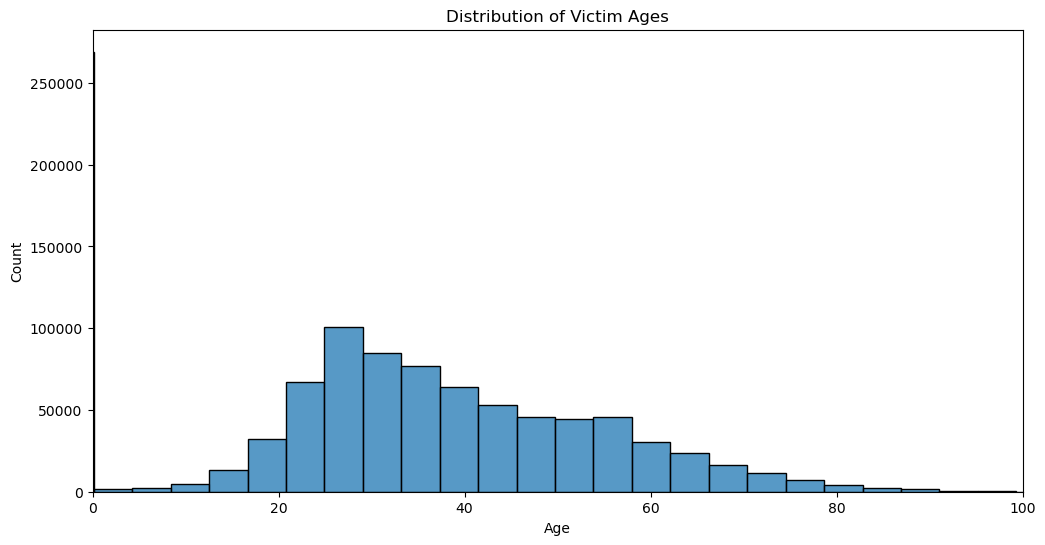

In [35]:
# Distribution of victim ages
plt.figure(figsize=(12, 6))
sns.histplot(crime['Vict Age'], bins=30)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.xlim(0, 100)  # Limit to reasonable age range

Text(0.5, 1.0, 'Victim Sex Distribution')

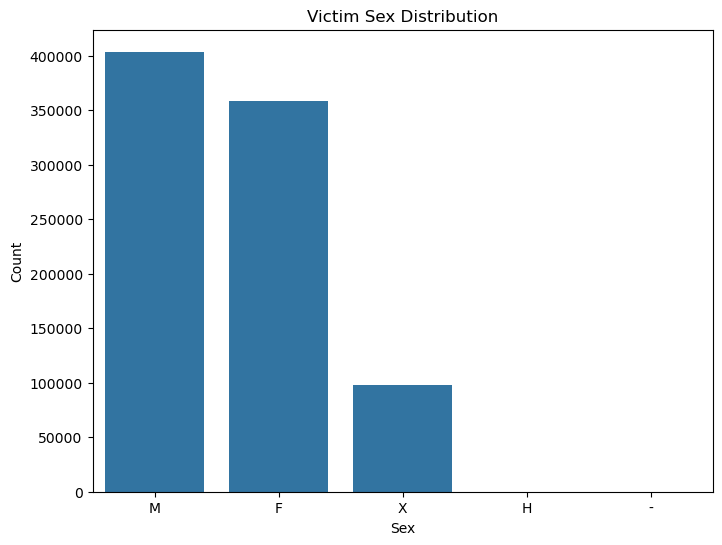

In [36]:
# Victim sex distribution
victim_sex = crime['Vict Sex'].value_counts().reset_index()
victim_sex.columns = ['Sex', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Count', data=victim_sex)
plt.title('Victim Sex Distribution')

Text(0.5, 1.0, 'Victim Descent Distribution (Top 10)')

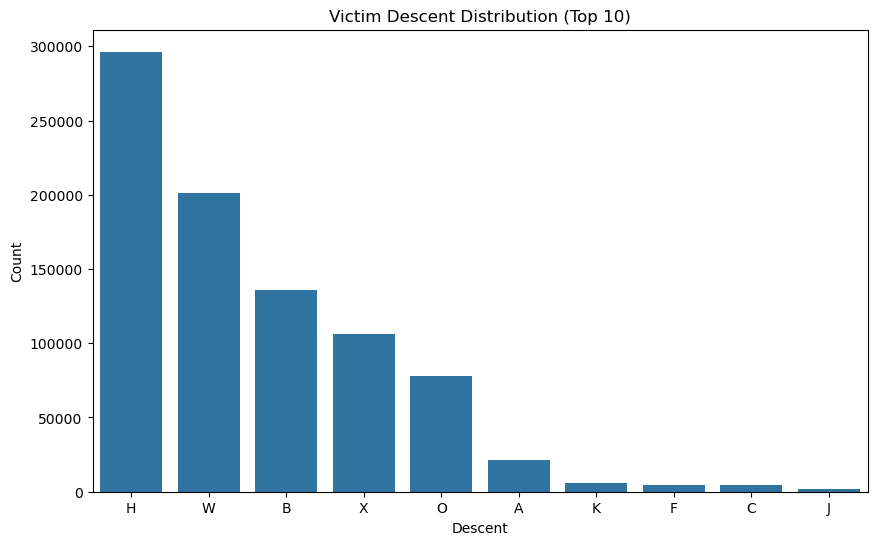

In [37]:
# Victim descent distribution
victim_descent = crime['Vict Descent'].value_counts().reset_index()
victim_descent.columns = ['Descent', 'Count']
victim_descent = victim_descent.head(10)  # Top 10 categories

plt.figure(figsize=(10, 6))
sns.barplot(x='Descent', y='Count', data=victim_descent)
plt.title('Victim Descent Distribution (Top 10)')

<Figure size 1200x800 with 0 Axes>

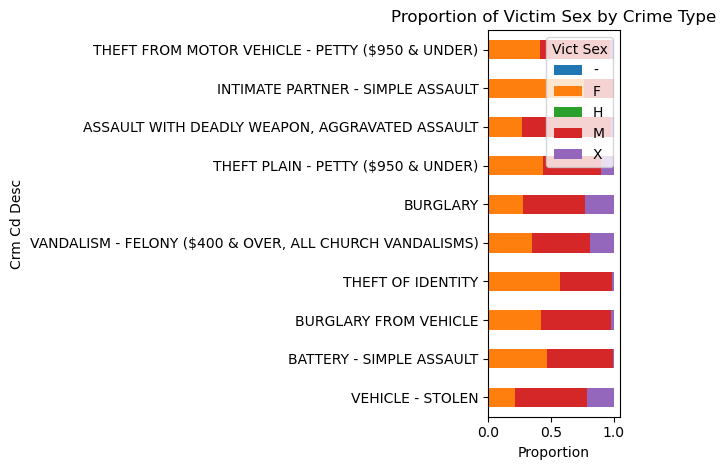

In [38]:
# Relationship between victim demographics and crime types
crime_by_sex = crime.groupby(['Crm Cd Desc', 'Vict Sex']).size().unstack().fillna(0)
crime_by_sex = crime_by_sex.div(crime_by_sex.sum(axis=1), axis=0)  # Convert to proportions
crime_by_sex = crime_by_sex.loc[crime_types['Crm Cd Desc'][:10]]  # Top 10 crime types

plt.figure(figsize=(12, 8))
crime_by_sex.plot(kind='barh', stacked=True)
plt.title('Proportion of Victim Sex by Crime Type')
plt.xlabel('Proportion')
plt.tight_layout()

### Time Series Analysis for Crime Data

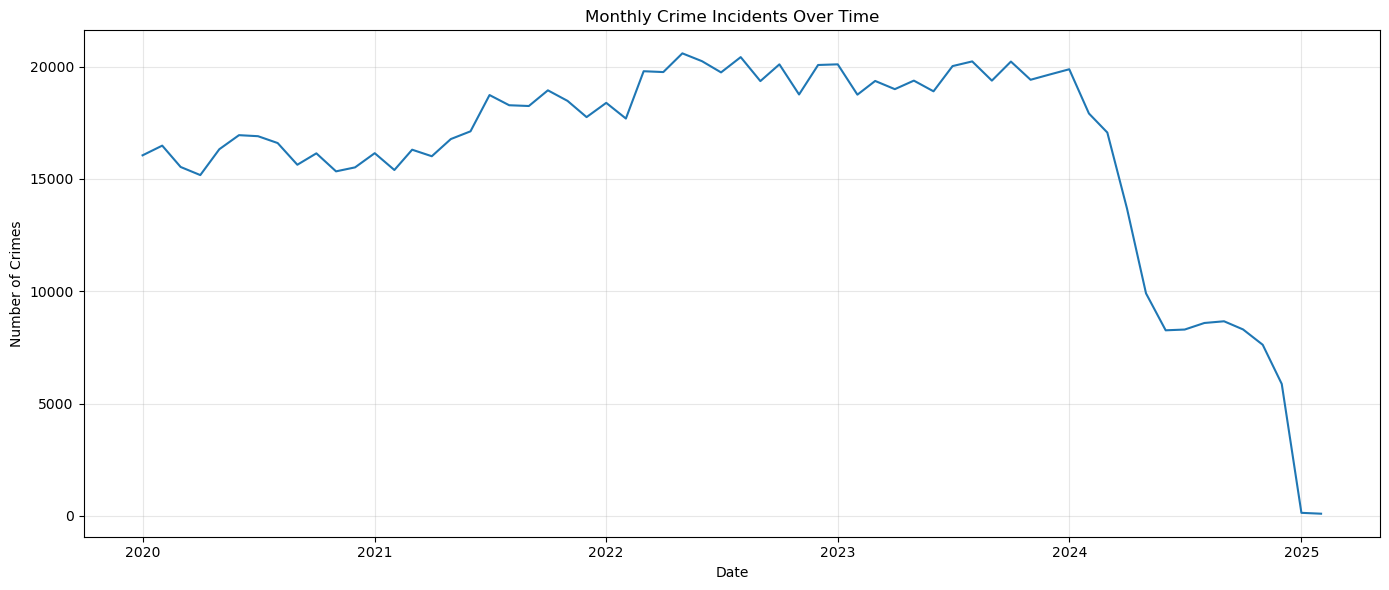

In [40]:
# Monthly crime trends
monthly_crime = crime.groupby(['Year', 'Month']).size().reset_index(name='count')
monthly_crime['Date'] = pd.to_datetime(monthly_crime[['Year', 'Month']].assign(day=1))

# Plot monthly trends
plt.figure(figsize=(14, 6))
plt.plot(monthly_crime['Date'], monthly_crime['count'])
plt.title('Monthly Crime Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True, alpha=0.3)
plt.tight_layout()

Text(120.72222222222221, 0.5, 'Day of Week')

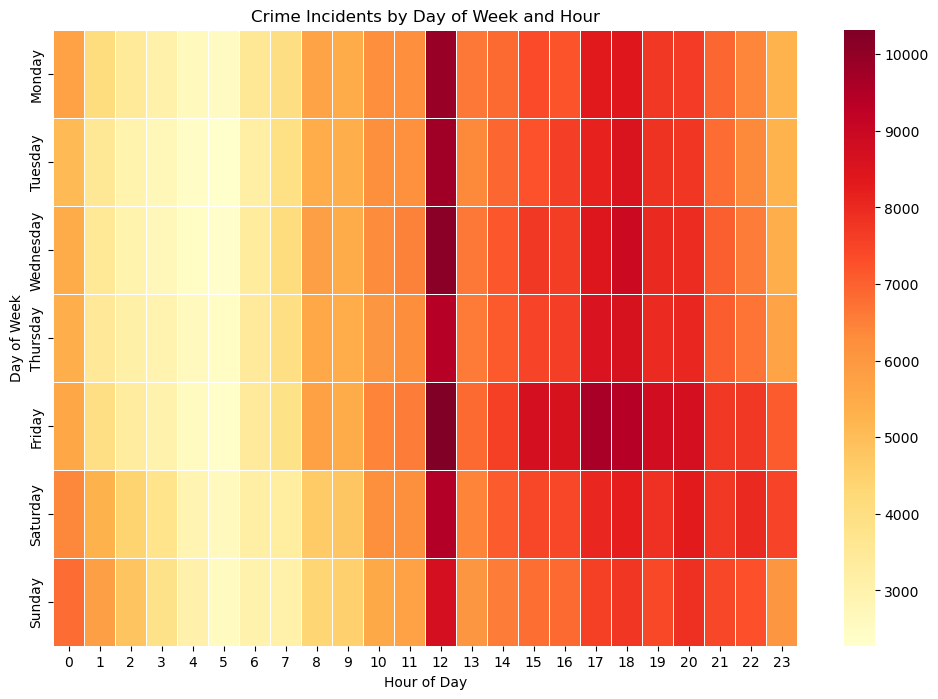

In [41]:
# Crime by day of week and hour
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
crime['DayOfWeek'] = crime['DATE OCC'].dt.day_name()
crime['Hour'] = crime['TIME OCC'] // 100  # Convert military time to hour

# Create heatmap of crimes by day and hour
day_hour_crimes = crime.groupby(['DayOfWeek', 'Hour']).size().unstack()
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_hour_crimes = day_hour_crimes.reindex(day_order)

plt.figure(figsize=(12, 8))
sns.heatmap(day_hour_crimes, cmap='YlOrRd', linewidths=0.5)
plt.title('Crime Incidents by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

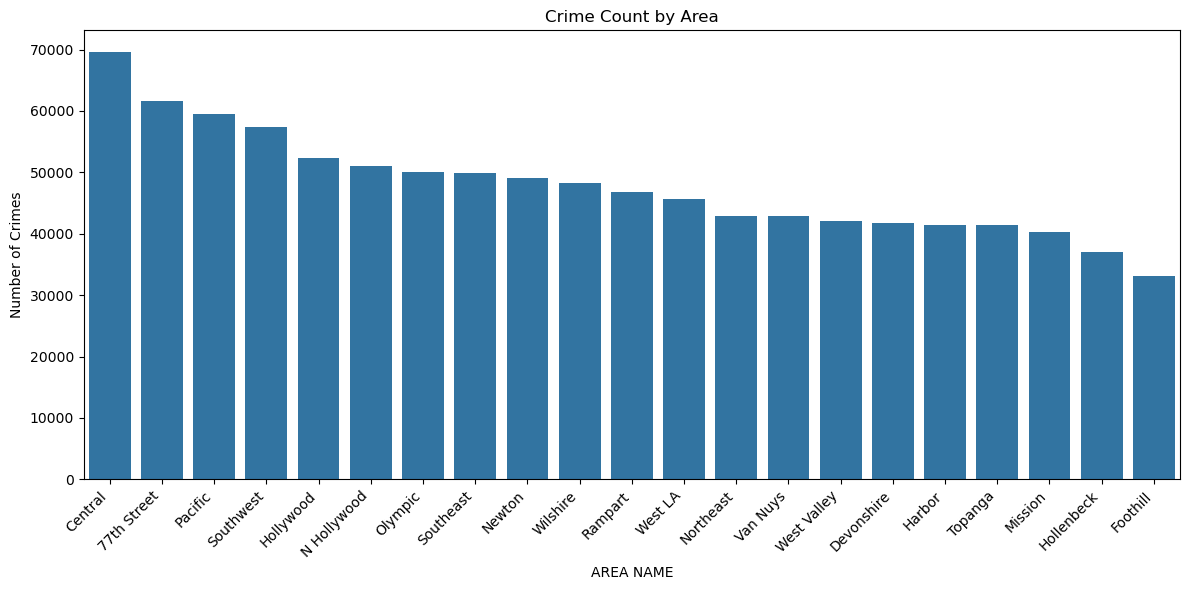

In [42]:
# Compare crime density by area
area_crimes = crime['AREA NAME'].value_counts().reset_index()
area_crimes.columns = ['AREA NAME', 'Number of Crimes']

plt.figure(figsize=(12, 6))
sns.barplot(x='AREA NAME', y='Number of Crimes', data=area_crimes.sort_values('Number of Crimes', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Crime Count by Area')
plt.tight_layout()

### Combine Crime and Building Inspection Data

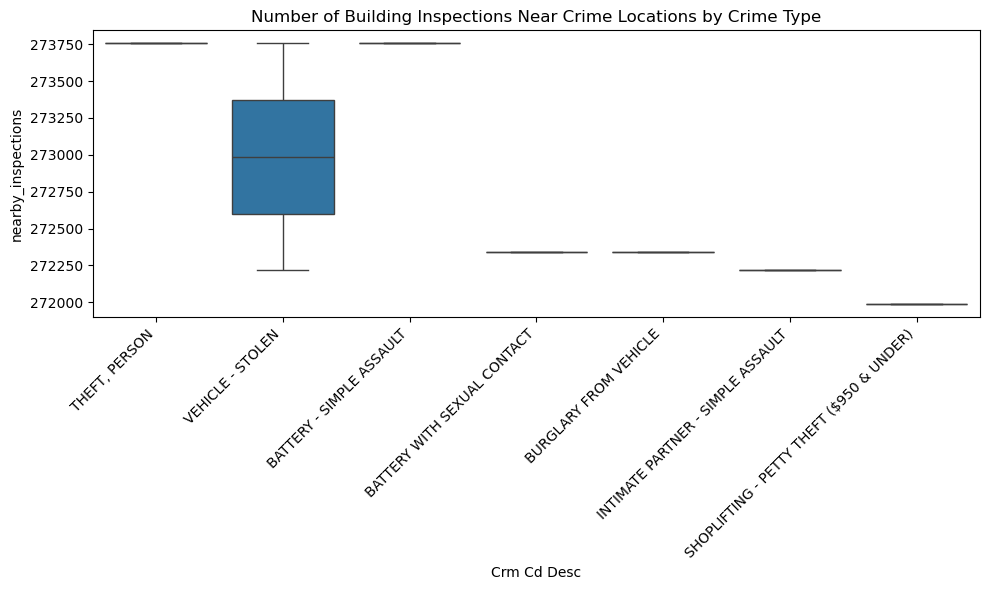

In [44]:
from scipy.spatial import cKDTree

# Function to find building inspections near crime locations
def find_nearby_inspections(crime_row, inspection_coords, inspection_idx, radius=0.01):
    """Find building inspections within radius of crime location"""
    crime_coord = (crime_row['LAT'], crime_row['LON'])
    nearby_idx = inspection_idx.query_ball_point(crime_coord, radius)
    return len(nearby_idx)

# Create a sample of crime data for efficiency
crime_sample = crime.sample(n=10000, random_state=42)

# Create KD-Tree from inspection coordinates
inspection_coords = list(zip(ins['Latitude'], ins['Longitude']))
inspection_idx = cKDTree(inspection_coords)

# Find nearby inspections for each crime
crime_sample['nearby_inspections'] = crime_sample.apply(
    lambda row: find_nearby_inspections(row, inspection_coords, inspection_idx), 
    axis=1
)

# Analyze relationship between crime and building inspections
plt.figure(figsize=(10, 6))
sns.boxplot(x='Crm Cd Desc', y='nearby_inspections', data=crime_sample.nlargest(10, 'nearby_inspections'))
plt.xticks(rotation=45, ha='right')
plt.title('Number of Building Inspections Near Crime Locations by Crime Type')
plt.tight_layout()

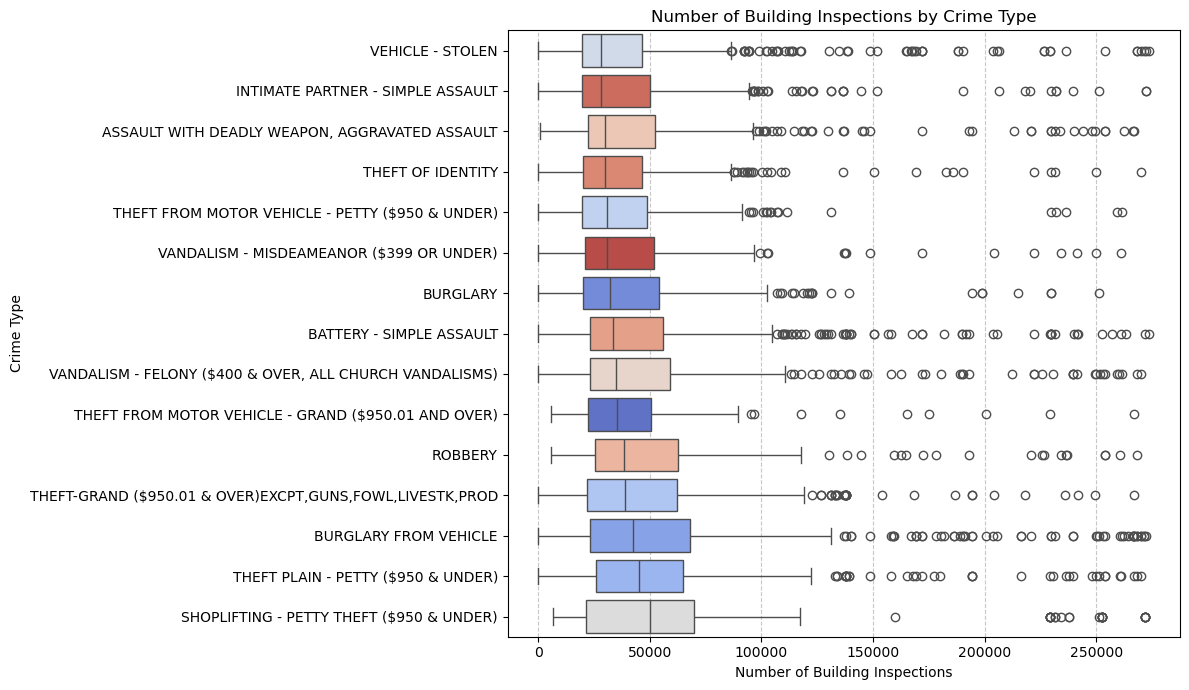

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data, extracted to include more crime types
top_crime_types = crime_sample['Crm Cd Desc'].value_counts().head(15).index
filtered_crime_data = crime_sample[crime_sample['Crm Cd Desc'].isin(top_crime_types)]

# Use median sorting
median_inspections = filtered_crime_data.groupby('Crm Cd Desc')['nearby_inspections'].median().sort_values()

# Create a boxplot with the correct usage of 'hue' and 'palette'
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='nearby_inspections',
    y='Crm Cd Desc',
    hue='Crm Cd Desc',  # Set 'hue' instead of 'y' for the palette
    data=filtered_crime_data,
    order=median_inspections.index,
    palette='coolwarm',
    dodge=False  # Ensure the hue doesn't cause separate groups
)

plt.xlabel('Number of Building Inspections')
plt.ylabel('Crime Type')
plt.title('Number of Building Inspections by Crime Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Business Density Analysis

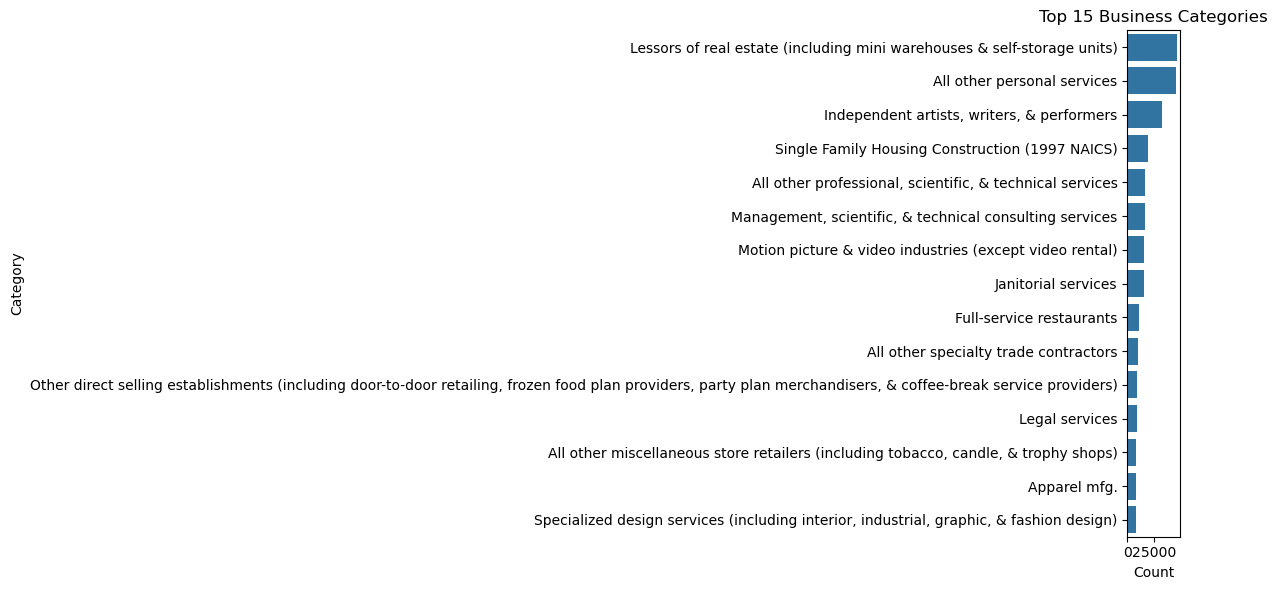

In [47]:
# Extract business categories
business_categories = bd['PRIMARY NAICS DESCRIPTION'].value_counts().reset_index()
business_categories.columns = ['Category', 'Count']
business_categories = business_categories.head(15)  # Top 15 categories

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Category', data=business_categories)
plt.title('Top 15 Business Categories')
plt.tight_layout()

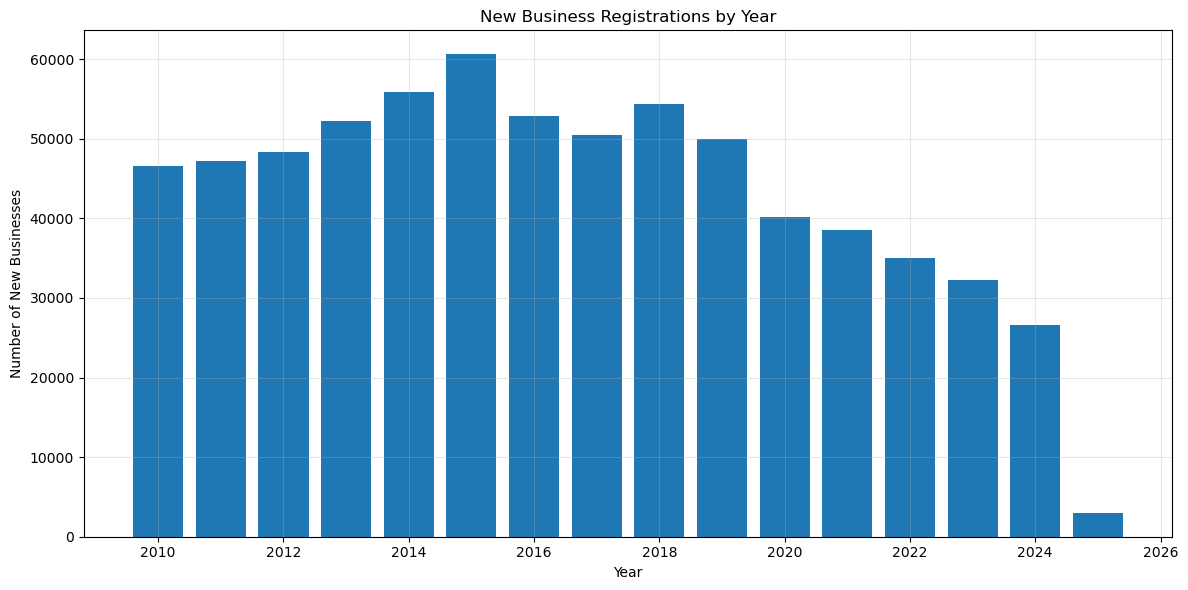

In [48]:
# Business openings over time
bd['LOCATION START DATE'] = pd.to_datetime(bd['LOCATION START DATE'], format='%m/%d/%Y')
bd['Year'] = bd['LOCATION START DATE'].dt.year

business_growth = bd.groupby('Year').size().reset_index(name='New Businesses')
business_growth = business_growth[business_growth['Year'] >= 2010]  # Focus on recent years

plt.figure(figsize=(12, 6))
plt.bar(business_growth['Year'], business_growth['New Businesses'])
plt.title('New Business Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Number of New Businesses')
plt.grid(True, alpha=0.3)
plt.tight_layout()

### Building Inspection Analysis

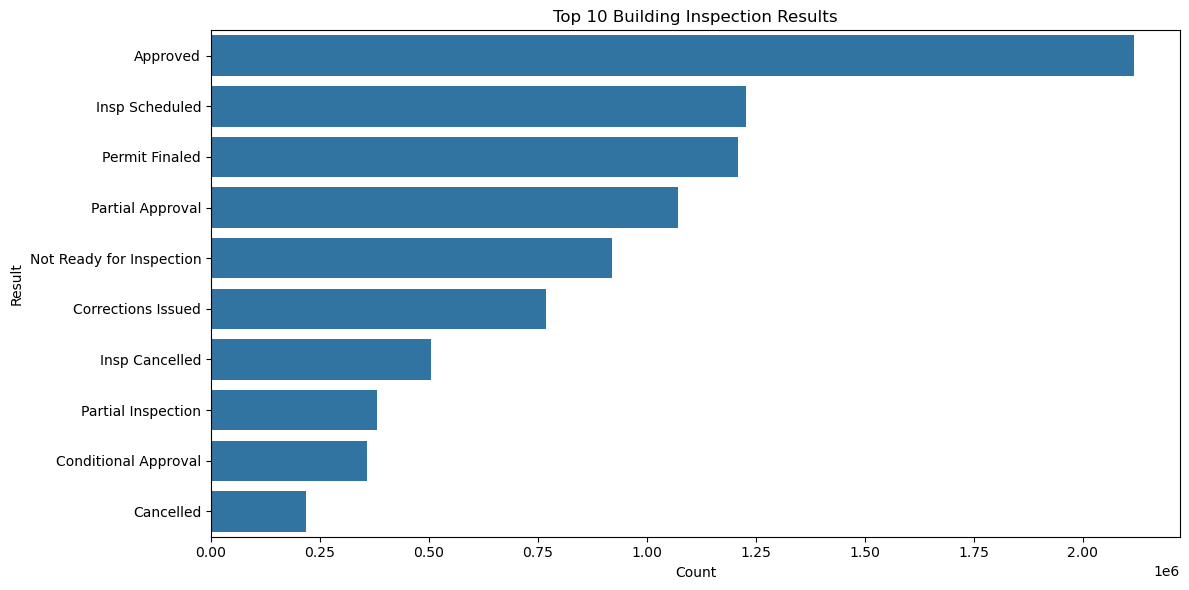

In [50]:
# Analyze inspection results
inspection_results = ins['Inspection Result'].value_counts().head(10).reset_index()
inspection_results.columns = ['Result', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Result', data=inspection_results)
plt.title('Top 10 Building Inspection Results')
plt.tight_layout()

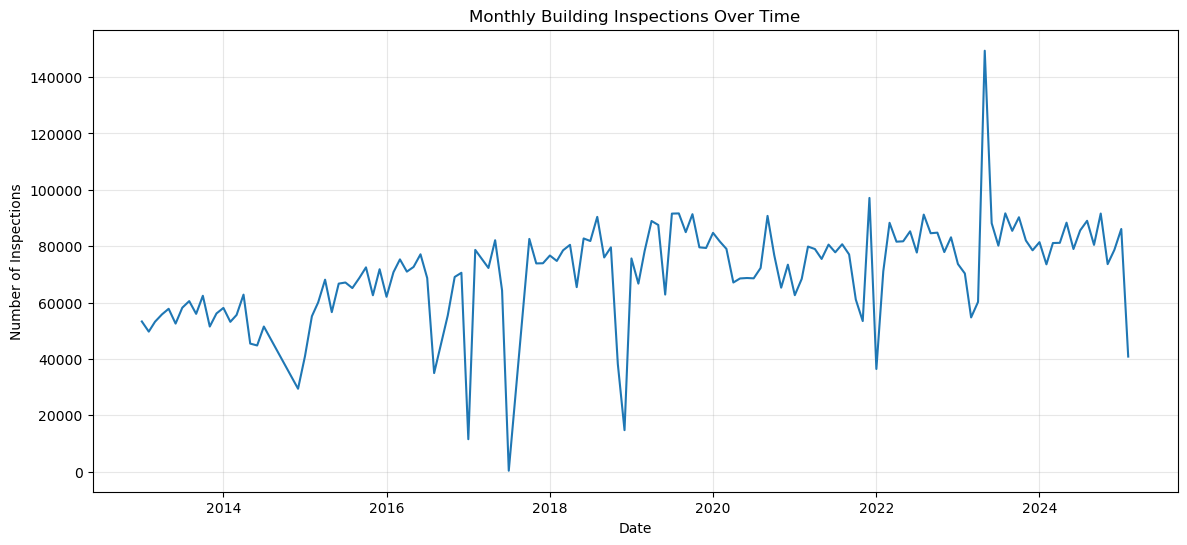

In [51]:
# Analyze inspection trends over time
monthly_inspections = ins.groupby(['Year', 'Month']).size().reset_index(name='count')
monthly_inspections['Date'] = pd.to_datetime(monthly_inspections[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 6))
plt.plot(monthly_inspections['Date'], monthly_inspections['count'])
plt.title('Monthly Building Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Inspections')
plt.grid(True, alpha=0.3)

### Correlation Analysis Between Variables

In [53]:
# For crime data, we can analyze:
# - TIME_OCC (time of occurrence)
# - Vict Age
# - LAT/LON (coordinates)

# Create a correlation dataframe
crime_corr_data = crime[['TIME OCC', 'Vict Age', 'LAT', 'LON']].copy()
crime_corr_data.columns = ['Time_of_Day', 'Victim_Age', 'Latitude', 'Longitude']

# Calculate correlation matrix
corr_matrix = crime_corr_data.corr()
print("\nCorrelation Matrix for Crime Data Numerical Variables:")
print(corr_matrix)


Correlation Matrix for Crime Data Numerical Variables:
             Time_of_Day  Victim_Age  Latitude  Longitude
Time_of_Day     1.000000   -0.035619  0.003127  -0.002829
Victim_Age     -0.035619    1.000000 -0.000841   0.002204
Latitude        0.003127   -0.000841  1.000000  -0.998190
Longitude      -0.002829    0.002204 -0.998190   1.000000


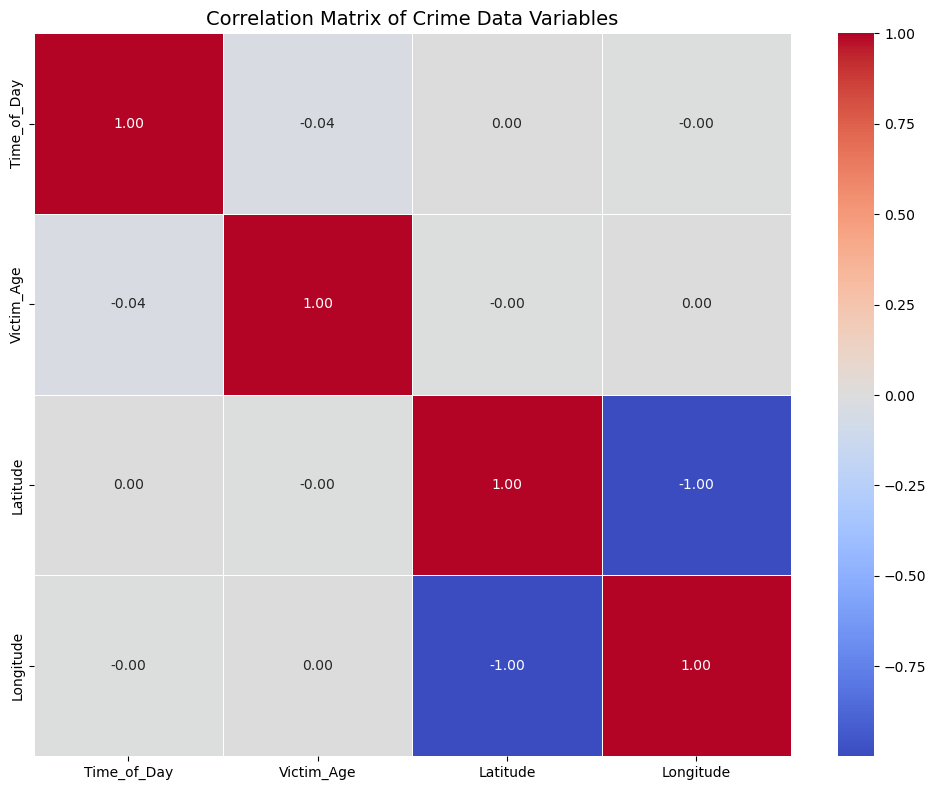

In [54]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Crime Data Variables', fontsize=14)
plt.tight_layout()

In [55]:
# Investigate relationship between time of day and crime type
# Create hour categories
crime['Hour_Category'] = pd.cut(
    crime['TIME OCC'] // 100, 
    bins=[0, 6, 12, 18, 24], 
    labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
)

# Cross-tabulation of crime types by time of day
top_crimes = crime['Crm Cd Desc'].value_counts().head(5).index
crime_by_time = pd.crosstab(
    crime[crime['Crm Cd Desc'].isin(top_crimes)]['Crm Cd Desc'],
    crime[crime['Crm Cd Desc'].isin(top_crimes)]['Hour_Category']
)

# Convert to percentages
crime_by_time_pct = crime_by_time.div(crime_by_time.sum(axis=1), axis=0) * 100

print("\nCrime Types by Time of Day (Percentages):")
print(crime_by_time_pct)

# Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(crime_by_time)
print(f"\nChi-square Test for Crime Type vs. Time of Day:")
print(f"Chi2 value: {chi2:.2f}")
print(f"p-value: {p:.8f}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a significant relationship between crime type and time of day")
else:
    print("No significant relationship between crime type and time of day")


Crime Types by Time of Day (Percentages):
Hour_Category                                       Night (0-6)  \
Crm Cd Desc                                                       
BATTERY - SIMPLE ASSAULT                              10.407527   
BURGLARY FROM VEHICLE                                 14.435434   
THEFT OF IDENTITY                                     14.336644   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...    16.488398   
VEHICLE - STOLEN                                      14.159411   

Hour_Category                                       Morning (6-12)  \
Crm Cd Desc                                                          
BATTERY - SIMPLE ASSAULT                                 26.849323   
BURGLARY FROM VEHICLE                                    17.743043   
THEFT OF IDENTITY                                        48.934019   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       23.587807   
VEHICLE - STOLEN                                         19.246028 

<Figure size 1400x800 with 0 Axes>

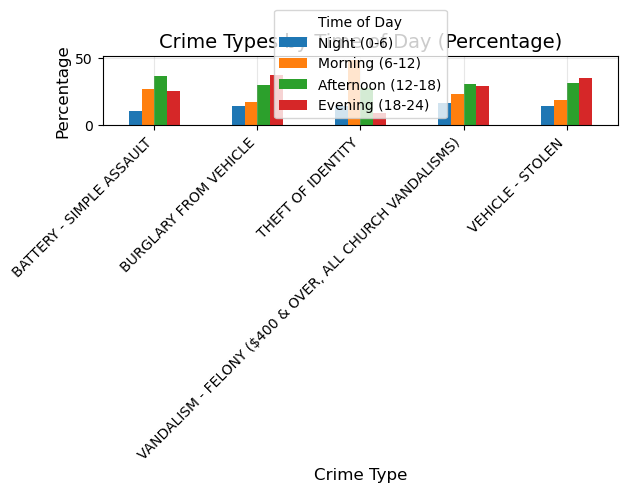

In [56]:
# Visualize the relationship
plt.figure(figsize=(14, 8))
crime_by_time_pct.plot(kind='bar')
plt.title('Crime Types by Time of Day (Percentage)', fontsize=14)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time of Day')
plt.grid(True, alpha=0.3)
plt.tight_layout()

### Statistical Analysis of Spatial Patterns

In [58]:
# Calculate distance from city center (approximate downtown LA coordinates)
downtown_la = (34.0522, -118.2437)

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance between two points on the earth"""
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

In [59]:
# Add distance from downtown LA to crime data
crime_sample = crime.sample(n=10000) if len(crime) > 10000 else crime
crime_sample['distance_from_downtown'] = crime_sample.apply(
    lambda row: haversine_distance(row['LAT'], row['LON'], downtown_la[0], downtown_la[1]),
    axis=1
)

# Basic statistics on distance
dist_stats = crime_sample['distance_from_downtown'].describe()
print("\nStatistics for Crime Distance from Downtown LA (km):")
print(dist_stats)


Statistics for Crime Distance from Downtown LA (km):
count    10000.000000
mean        50.602075
std        663.748806
min          0.027638
25%          6.276274
50%         11.806315
75%         24.077436
max      12574.353210
Name: distance_from_downtown, dtype: float64


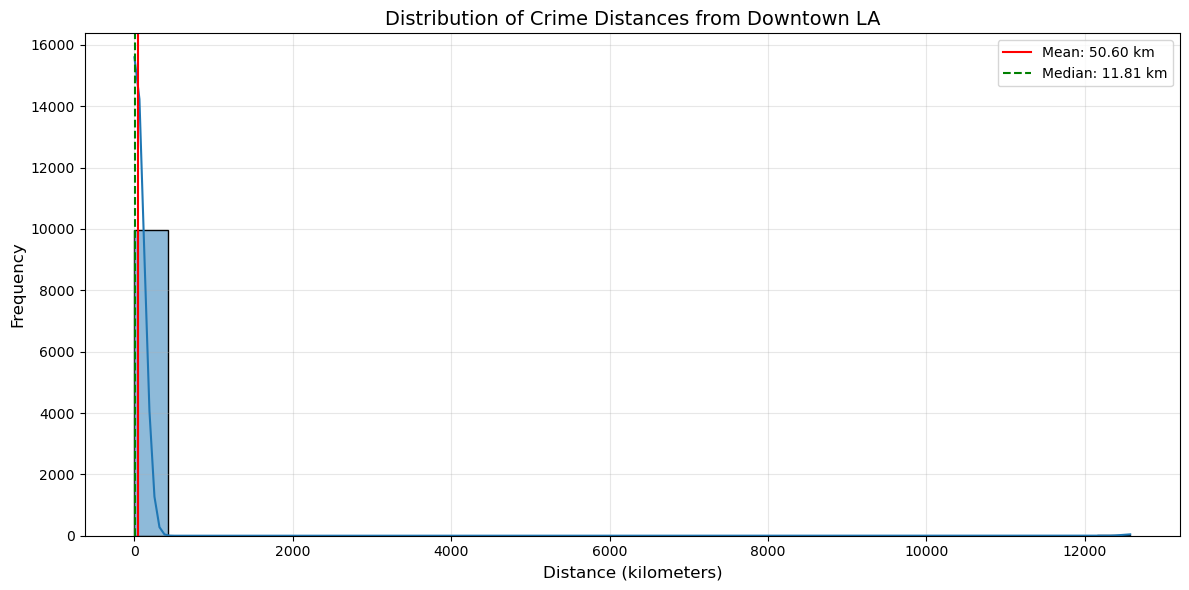

In [60]:
# Visualize distance distribution
plt.figure(figsize=(12, 6))
sns.histplot(crime_sample['distance_from_downtown'], kde=True, bins=30)
plt.axvline(crime_sample['distance_from_downtown'].mean(), color='r', linestyle='-', 
           label=f'Mean: {crime_sample["distance_from_downtown"].mean():.2f} km')
plt.axvline(crime_sample['distance_from_downtown'].median(), color='g', linestyle='--', 
           label=f'Median: {crime_sample["distance_from_downtown"].median():.2f} km')

plt.title('Distribution of Crime Distances from Downtown LA', fontsize=14)
plt.xlabel('Distance (kilometers)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [61]:
# Analyze crime types by distance from downtown
# Group crimes into distance bins
crime_sample['distance_bin'] = pd.cut(
    crime_sample['distance_from_downtown'],
    bins=[0, 5, 10, 15, 20, np.inf],
    labels=['0-5 km', '5-10 km', '10-15 km', '15-20 km', '20+ km']
)

# Get top crime types
top_crime_types = crime_sample['Crm Cd Desc'].value_counts().head(5).index

# Creates a table showing the count of crimes across different distance.
crime_by_distance = pd.crosstab(
    crime_sample[crime_sample['Crm Cd Desc'].isin(top_crime_types)]['Crm Cd Desc'],
    crime_sample[crime_sample['Crm Cd Desc'].isin(top_crime_types)]['distance_bin']
)

# Convert to percentages
crime_by_distance_pct = crime_by_distance.div(crime_by_distance.sum(axis=1), axis=0) * 100

print("\nCrime Types by Distance from Downtown (Percentages):")
print(crime_by_distance_pct)

# Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(crime_by_distance)
print(f"\nChi-square Test for Crime Type vs. Distance from Downtown:")
print(f"Chi2 value: {chi2:.2f}")
print(f"p-value: {p:.8f}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is a significant relationship between crime type and distance from downtown")
else:
    print("No significant relationship between crime type and distance from downtown")


Crime Types by Distance from Downtown (Percentages):
distance_bin                                           0-5 km    5-10 km  \
Crm Cd Desc                                                                
BATTERY - SIMPLE ASSAULT                            22.222222  24.050633   
BURGLARY FROM VEHICLE                               26.205788  16.881029   
THEFT OF IDENTITY                                   10.823910  25.686591   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...  22.539683  20.952381   
VEHICLE - STOLEN                                    17.349608  25.719268   

distance_bin                                         10-15 km   15-20 km  \
Crm Cd Desc                                                                
BATTERY - SIMPLE ASSAULT                            13.220816   8.157525   
BURGLARY FROM VEHICLE                               15.112540  10.610932   
THEFT OF IDENTITY                                   17.770598   9.854604   
VANDALISM - FELONY ($400 & OVER, 

<Figure size 1400x800 with 0 Axes>

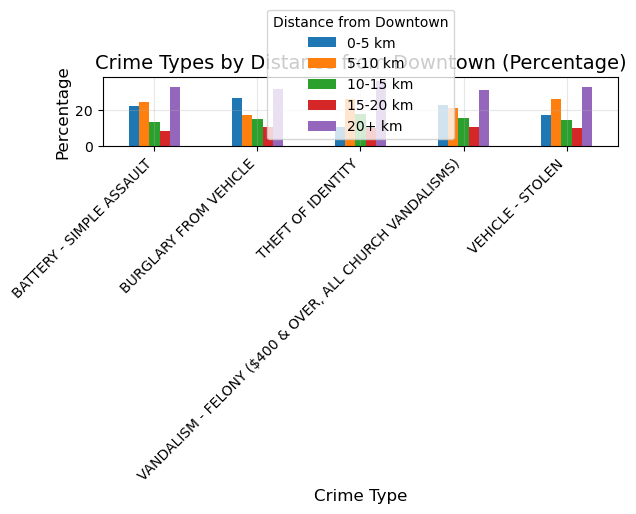

In [62]:
# Visualize the relationship
plt.figure(figsize=(14, 8))
crime_by_distance_pct.plot(kind='bar')
plt.title('Crime Types by Distance from Downtown (Percentage)', fontsize=14)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Distance from Downtown')
plt.grid(True, alpha=0.3)
plt.tight_layout()

/var/folders/bm/1zdq_80s1psgz2m98q3cbx1r0000gn/T/ipykernel_65199/745264995.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

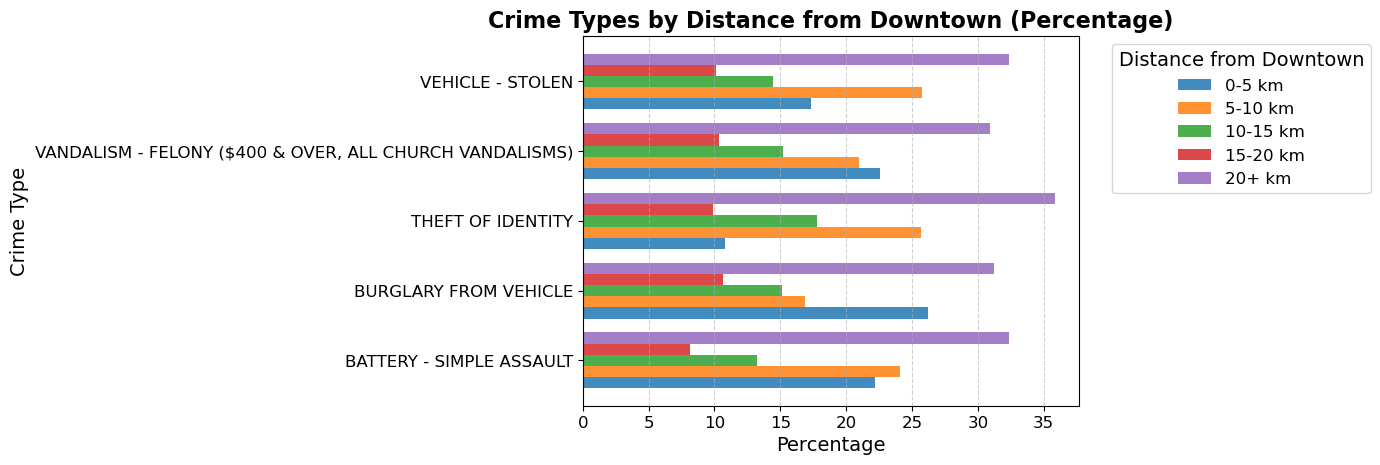

In [66]:
import matplotlib.pyplot as plt

# Increase figure size for better readability
plt.figure(figsize=(16, 10))

# Use horizontal bar chart (barh) for better label alignment
crime_by_distance_pct.plot(kind='barh', width=0.8, alpha=0.85)

# Formatting the title and labels
plt.title('Crime Types by Distance from Downtown (Percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)

# Adjust font sizes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside the plot
plt.legend(title='Distance from Downtown', fontsize=12, title_fontsize=14, 
           bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Add a light grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout to fit elements properly
plt.tight_layout()

# Show the plot
plt.show()
